<a href="https://colab.research.google.com/github/manash059/Machine-learning-397/blob/main/ML_LAB_EXP6A%2C6B%2C7A%2C7B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPERIMENT-6A

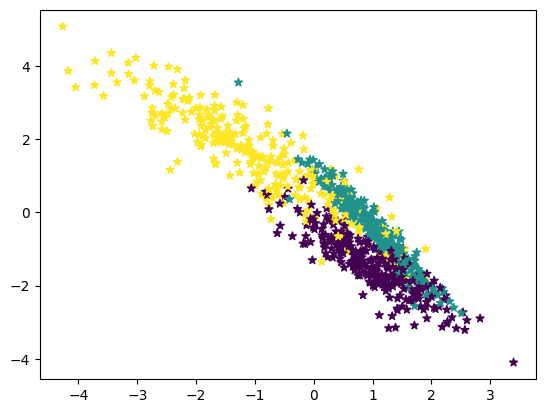

Actual Value: 0
Predicted Value: 0
Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


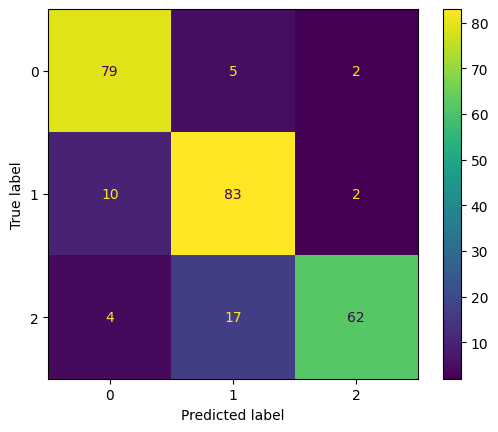

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
X, y = make_classification(
    n_features=6, n_classes=3, n_samples=800, n_informative=2, random_state=1, n_clusters_per_class=1
)
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*")
plt.show()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict([X_test[6]])
print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

EXCERISE-6B

Accuracy: 0.81

Confusion Matrix:
 [[17 27]
 [ 1 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.39      0.55        44
           1       0.79      0.99      0.88       100

    accuracy                           0.81       144
   macro avg       0.87      0.69      0.71       144
weighted avg       0.83      0.81      0.78       144



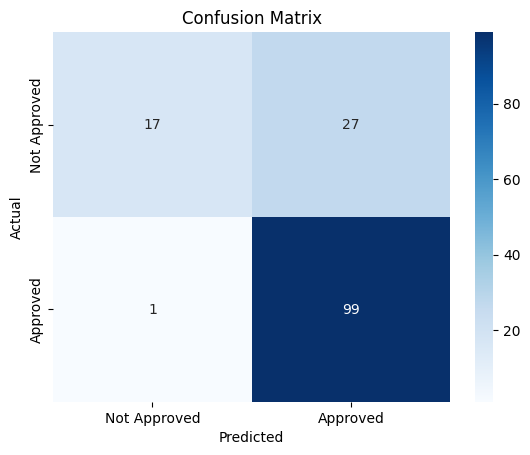

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv('/content/loan.csv')

# Drop unnecessary columns and handle missing values
data.drop(columns=['Loan_ID'], inplace=True)
data.dropna(inplace=True)

# Convert 'Dependents' column to numeric (replace '3+' with 3)
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)

# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encode target variable
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

# Define features and target
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

EXCERSICE 7A

In [6]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.3 MB/s eta 0:00:00


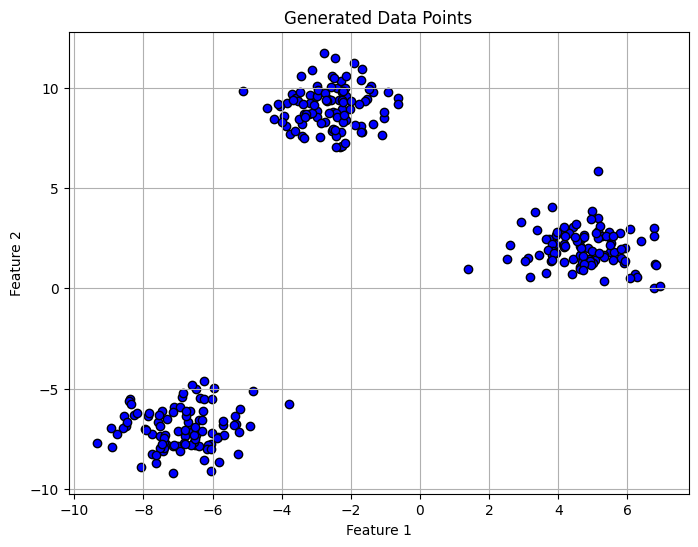

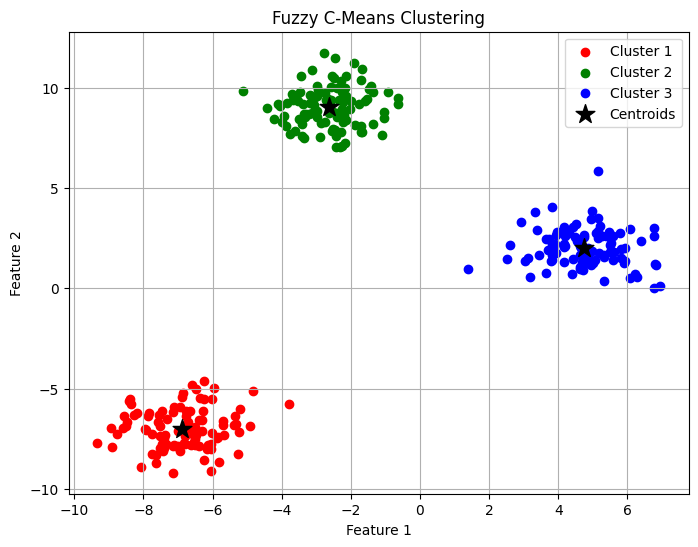


Membership values for the first data point:
Cluster 1: 0.995
Cluster 2: 0.002
Cluster 3: 0.003

Fuzzy Partition Coefficient (FPC): 0.958


In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import skfuzzy as fuzz  # Import skfuzzy with alias 'fuzz'


# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

# Creating a dataset
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

# Visualize the original dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k')
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

# Fuzzy C-Means clustering
# Transpose the data for compatibility with skfuzzy
X_transposed = np.transpose(X)

# Set the number of clusters and perform Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_transposed,
    c=n_clusters,
    m=2,
    error=0.005,
    maxiter=1000,
    init=None
)

# Assign clusters to each data point
cluster_membership = np.argmax(u, axis=0)

# Visualize clustered data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(n_clusters):
    plt.scatter(X[cluster_membership == i, 0],
                X[cluster_membership == i, 1],
                color=colors[i],
                label=f"Cluster {i+1}")

# Plot cluster centers
plt.scatter(cntr[:, 0], cntr[:, 1],
            c='black',
            marker='*',
            s=200,
            label='Centroids')

plt.title("Fuzzy C-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

# Print membership values for the first data point
print("\nMembership values for the first data point:")
for i in range(n_clusters):
    print(f"Cluster {i+1}: {u[i][0]:.3f}")

# Print Fuzzy Partition Coefficient
print(f"\nFuzzy Partition Coefficient (FPC): {fpc:.3f}")